# Lending Club Statistics 선형 회귀 분석

이 데이터셋에는 현재 대출 상태 (대출중, 연체, 갚음 등) 및 최신 지불 정보를 포함하여 명시된 기간 동안 발행 된 모든 대출에 대한 완전한 대출 데이터가 들어 있습니다. "현재"를 통한 대출 데이터가 포함 된 파일에는 이전에 완료 한 달력 분기를 통해 발행 된 모든 대출에 대한 전체 대출 데이터가 들어 있습니다.

데이터셋 URL : https://www.lendingclub.com/info/download-data.action

* 데이터 셋
    * 

In [1]:
# Load Packages
import numpy as np
import pandas as pd
from sklearn.datasets import make_regression
import scipy as sp
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib as mpl
from ipykernel import kernelapp as app
# Settings
%matplotlib inline
sns.set(font="NanumGothic")

전체 

|컬럼명|설명|값 예시|
|---|---|---|
|loan_amnt|456|123|
|term
|int_rate
|installment
|sub_grade
|home_ownership
|annual_inc|
|pymnt_plan|
|dti|
|delinq_2yrs|
|inq_last_6mths|
|mths_since_last_delinq|
|mths_since_last_record|
|open_acc|
|pub_rec
|revol_bal
|revol_util
|total_acc
|out_prncp
|out_prncp_inv
|total_pymnt
|total_pymnt_inv
|total_rec_prncp
|total_rec_int
|total_rec_late_fee
|recoveries
|collection_recovery_fee
|last_pymnt_amnt|
|collections_12_mths_ex_med
|mths_since_last_major_derog|
|policy_code
|application_type
|acc_now_delinq
|tot_coll_amt
|tot_cur_bal
|open_acc_6m
|open_il_6m|
|open_il_12m
|open_il_24m
|mths_since_rcnt_il
|total_bal_il
|il_util
|open_rv_12m
|open_rv_24m
|max_bal_bc
|all_util
|total_rev_hi_lim
|inq_fi
|total_cu_tl
|inq_last_12m
|acc_open_past_24mths
|avg_cur_bal
|bc_open_to_buy
|bc_util
|chargeoff_within_12_mths
|delinq_amnt
|mo_sin_old_il_acct
|mo_sin_old_rev_tl_op
|mo_sin_rcnt_rev_tl_op
|mo_sin_rcnt_tl
|mort_acc
|mths_since_recent_bc
|mths_since_recent_bc_dlq
|mths_since_recent_inq|
|mths_since_recent_revol_delinq|
|num_accts_ever_120_pd
|num_actv_bc_tl
|num_actv_rev_tl|
|num_bc_sats
|num_bc_tl|
|num_il_tl
|num_op_rev_tl
|num_rev_accts
|num_rev_tl_bal_gt_0
|num_sats
|num_tl_120dpd_2m
|num_tl_30dpd
|num_tl_90g_dpd_24m
|num_tl_op_past_12m|
|pct_tl_nvr_dlq|
|percent_bc_gt_75|
|pub_rec_bankruptcies|
|tax_liens|
|tot_hi_cred_lim|
|total_bal_ex_mort|
|total_bc_limit|
|total_il_high_credit_limit|


## 데이터 불러오기

* 데이터 상세 내용
    * 154MB
    * 첫번째 줄에 features 문자
    * 422,723 건    

In [20]:
df0 = pd.read_csv("/home/dockeruser/hosthome/Documents/workspaces/projects/fc_team_project2/datasets/lcdf4.csv")

In [3]:
df0.columns

Index([u'Unnamed: 0', u'loan_amnt', u'term', u'int_rate', u'installment',
       u'sub_grade', u'home_ownership', u'annual_inc', u'pymnt_plan', u'dti',
       u'delinq_2yrs', u'inq_last_6mths', u'mths_since_last_delinq',
       u'mths_since_last_record', u'open_acc', u'pub_rec', u'revol_bal',
       u'revol_util', u'total_acc', u'out_prncp', u'out_prncp_inv',
       u'total_pymnt', u'total_pymnt_inv', u'total_rec_prncp',
       u'total_rec_int', u'total_rec_late_fee', u'recoveries',
       u'collection_recovery_fee', u'last_pymnt_amnt',
       u'collections_12_mths_ex_med', u'mths_since_last_major_derog',
       u'policy_code', u'application_type', u'acc_now_delinq', u'tot_coll_amt',
       u'tot_cur_bal', u'open_acc_6m', u'open_il_6m', u'open_il_12m',
       u'open_il_24m', u'mths_since_rcnt_il', u'total_bal_il', u'il_util',
       u'open_rv_12m', u'open_rv_24m', u'max_bal_bc', u'all_util',
       u'total_rev_hi_lim', u'inq_fi', u'total_cu_tl', u'inq_last_12m',
       u'acc_open_past_

## 데이터 전처리 과정

## 데이터 스케일링

In [16]:
# nan 값이 없는 칼럼을 drop으로 만듬. 재구현 코드 없음 !! 

float_col = [u'int_rate', u'installment', u'annual_inc', u'dti', u'inq_last_6mths',
       u'revol_util', u'out_prncp', u'out_prncp_inv', u'total_pymnt',
       u'total_pymnt_inv', u'total_rec_prncp', u'total_rec_int',
       u'total_rec_late_fee', u'recoveries', u'collection_recovery_fee',
       u'last_pymnt_amnt', u'open_acc_6m', u'open_il_6m', u'open_il_12m',
       u'open_il_24m', u'total_bal_il', u'open_rv_12m', u'open_rv_24m',
       u'max_bal_bc', u'all_util', u'inq_fi', u'total_cu_tl', u'inq_last_12m',
       u'mo_sin_old_il_acct', u'pct_tl_nvr_dlq']

# 값이 정수인 칼럼만 따로 표시 재구현 코드 없음!!

cat = ["loan_amnt","revol_bal", "tot_coll_amt", "tot_cur_bal",
       "tot_coll_amt", "total_rev_hi_lim", "avg_cur_bal", "mo_sin_old_rev_tl_op",
       "tot_hi_cred_lim","total_bal_ex_mort","total_bc_limit","total_il_high_credit_limit"]

In [17]:
#값이 실수인 것중 nan 없는 애들 민맥스 스케일링
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(df0[float_col])
df0[float_col] = scaler.transform(df0[float_col])

In [18]:
#값이 정수인 칼럽 민맥스 스케일링
scaler = MinMaxScaler()
scaler.fit(df0[cat])
df0[cat] = scaler.transform(df0[cat])

### 이자율 데이터를 실수로 변환

원본 데이터에는 18.8% 형식의 문자열 데이터로 되어 있어 '%' 문자열을 제거하여 실수형으로 변환하였습니다.

In [19]:
def p2f(x):
    return float(x.strip('%')) / 100

df0['int_rate'] = df0.int_rate.map(p2f)

# 신청 타입 개인으로 한정
df0.drop(df0.application_type[df0.application_type != 'INDIVIDUAL'].index, axis=0, inplace=True)


In [26]:
int_col = df0.drop('Unnamed: 0', axis=1)
int_col = df0.dtypes[df0.dtypes =="int64"].index
float_col = df0.dtypes[df0.dtypes == "float64"].index

df0.loc[:, int_col]
#df0.loc[:, float_col]

In [29]:
pd.unique(df0.acc_now_delinq)

array([0, 1, 2, 3, 4, 6])

## 데이터 상관관계 분석

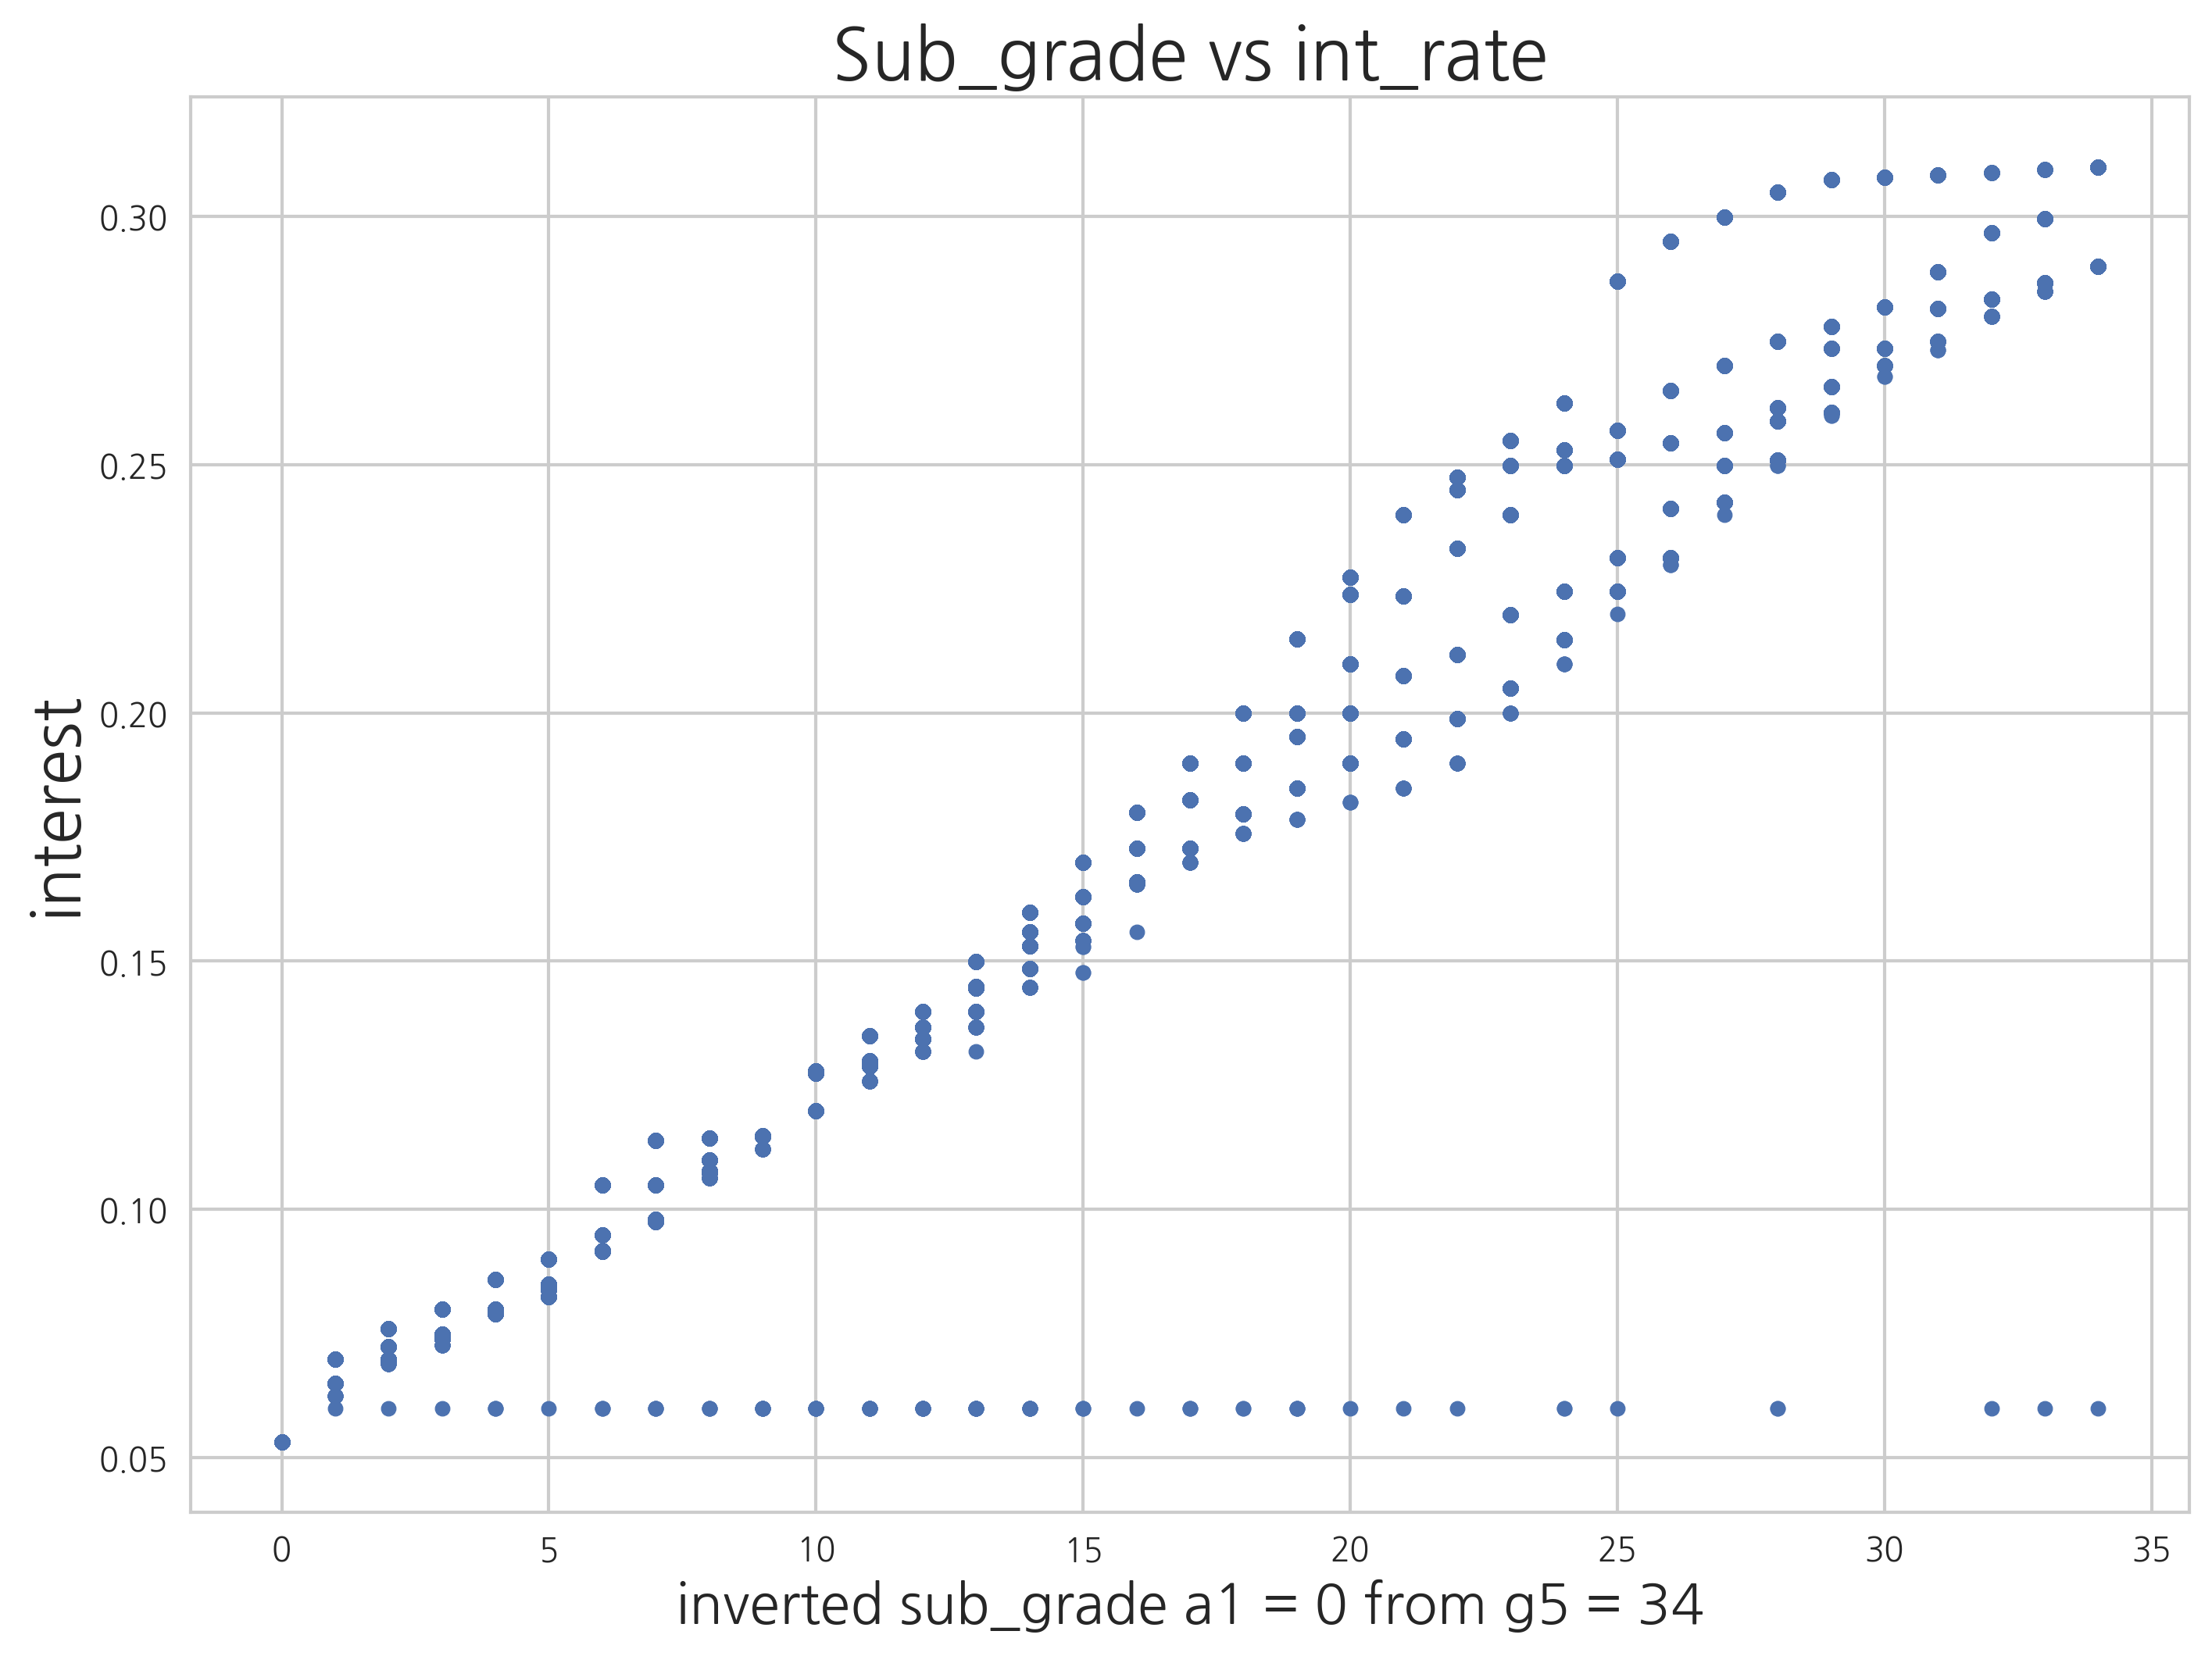

In [7]:
# Grade 를 Integer 형태로 변환하기
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(df0["sub_grade"].value_counts().index.sort_values())
le.classes_
df0["trs_grade"]=le.transform(df0["sub_grade"])

plt.scatter(df0["trs_grade"], df0["int_rate"],s=20)
plt.title("Sub_grade vs int_rate", size = 22)
plt.xlabel("inverted sub_grade a1 = 0 from g5 = 34", size=17)
plt.ylabel("interest", size=20)
plt.show()

In [9]:
# 이자율을 카테고리 데이터로 변환
bins = range(5,28)
labels = np.arange(5,27) + 0.5
df0["cut_intr"] = pd.cut(df0["int_rate"], bins, labels=labels)